# Introduction

<font size=4> Airbnb offers some options for people to rent a house longer (more than a month). In this document, I am going to discover how the distribution of long-term renting in six major cities (Toronto, Ottawa, Montreal, Quebec City, Vancouver and Victoria) in Canada from different perspectatives, including traveling time, neighbourhood and price. Long-term renting will be divided into three categories, month, season, and more than half a year. The main focuses will be :
1. What are the differences in the long-term rental options available in these six cities?
2. What's the difference between renting for a month, a season, half a year or longer in terms of locations or prices?
3. What is the hot months for people using long term options ?
4. What are the location of these long term options in these cities? Is it specific to some areas? 
5. What are the costs of houses in the areas that provide more long-term alternatives than others?
    
    
**Note:** In this analysis, only long-term housing will be considered, less than one month rentiing options will be excluded 

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
toronto = pd.read_csv("Toronto.csv")
ottawa = pd.read_csv("Ottawa.csv")
montreal = pd.read_csv("Montreal.csv")
qbc = pd.read_csv("Quebec_city.csv")
vancouver = pd.read_csv("Vancouver.csv")
victoria = pd.read_csv("Victoria.csv")

## null data

In [3]:
toronto.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [4]:
toronto.isnull().sum()

id                                    0
name                                  1
host_id                               0
host_name                            12
neighbourhood_group               15155
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3472
reviews_per_month                  3472
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           10314
dtype: int64

In [5]:
ottawa.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood_group               2515
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        364
reviews_per_month                  364
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2515
dtype: int64

In [6]:
montreal.isnull().sum()

id                                    0
name                                  5
host_id                               0
host_name                             2
neighbourhood_group               12333
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2655
reviews_per_month                  2655
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           12091
dtype: int64

In [7]:
qbc.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2225
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        305
reviews_per_month                  305
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2075
dtype: int64

In [8]:
vancouver.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood_group               4448
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        741
reviews_per_month                  741
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1340
dtype: int64

In [9]:
victoria.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            1
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        311
reviews_per_month                  311
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3101
dtype: int64

## Time Data Treatment

In [10]:
toronto['last_review'] = pd.to_datetime(toronto['last_review'], format='%Y-%m-%d')
ottawa['last_review'] = pd.to_datetime(ottawa['last_review'], format='%Y-%m-%d')
montreal['last_review'] = pd.to_datetime(montreal['last_review'], format='%Y-%m-%d')
qbc['last_review'] = pd.to_datetime(qbc['last_review'], format='%Y-%m-%d')
vancouver['last_review'] = pd.to_datetime(vancouver['last_review'], format='%Y-%m-%d')
victoria['last_review'] = pd.to_datetime(victoria['last_review'], format='%Y-%m-%d')

In [11]:
toronto['year'] = toronto['last_review'].dt.year
toronto['month'] = toronto['last_review'].dt.month

montreal['year'] = montreal['last_review'].dt.year
montreal['month'] = montreal['last_review'].dt.month

ottawa['year'] = ottawa['last_review'].dt.year
ottawa['month'] = ottawa['last_review'].dt.month

qbc['year'] = qbc['last_review'].dt.year
qbc['month'] = qbc['last_review'].dt.month

vancouver['year'] = vancouver['last_review'].dt.year
vancouver['month'] = vancouver['last_review'].dt.month

victoria['year'] = victoria['last_review'].dt.year
victoria['month'] = victoria['last_review'].dt.month

<font size=4> Although there are lots of null data in the last review attribute, I won't delete these rows with null data. Because the rows still contain other information, such as prices and neighbourhood.

# season or year

## Q1 : more than half a year

<font size=4> Get the data for these six cities with minimum nights more than 180 days

In [12]:
toronto180 = toronto[toronto['minimum_nights'] >=180]
ottawa180 = ottawa[ottawa['minimum_nights'] >=180]
montreal180 = montreal[montreal['minimum_nights'] >=180]
qbc180 = qbc[qbc['minimum_nights'] >=180]
vancouver180 = vancouver[vancouver['minimum_nights'] >=180]
victoria180 = victoria[victoria['minimum_nights'] >=180]

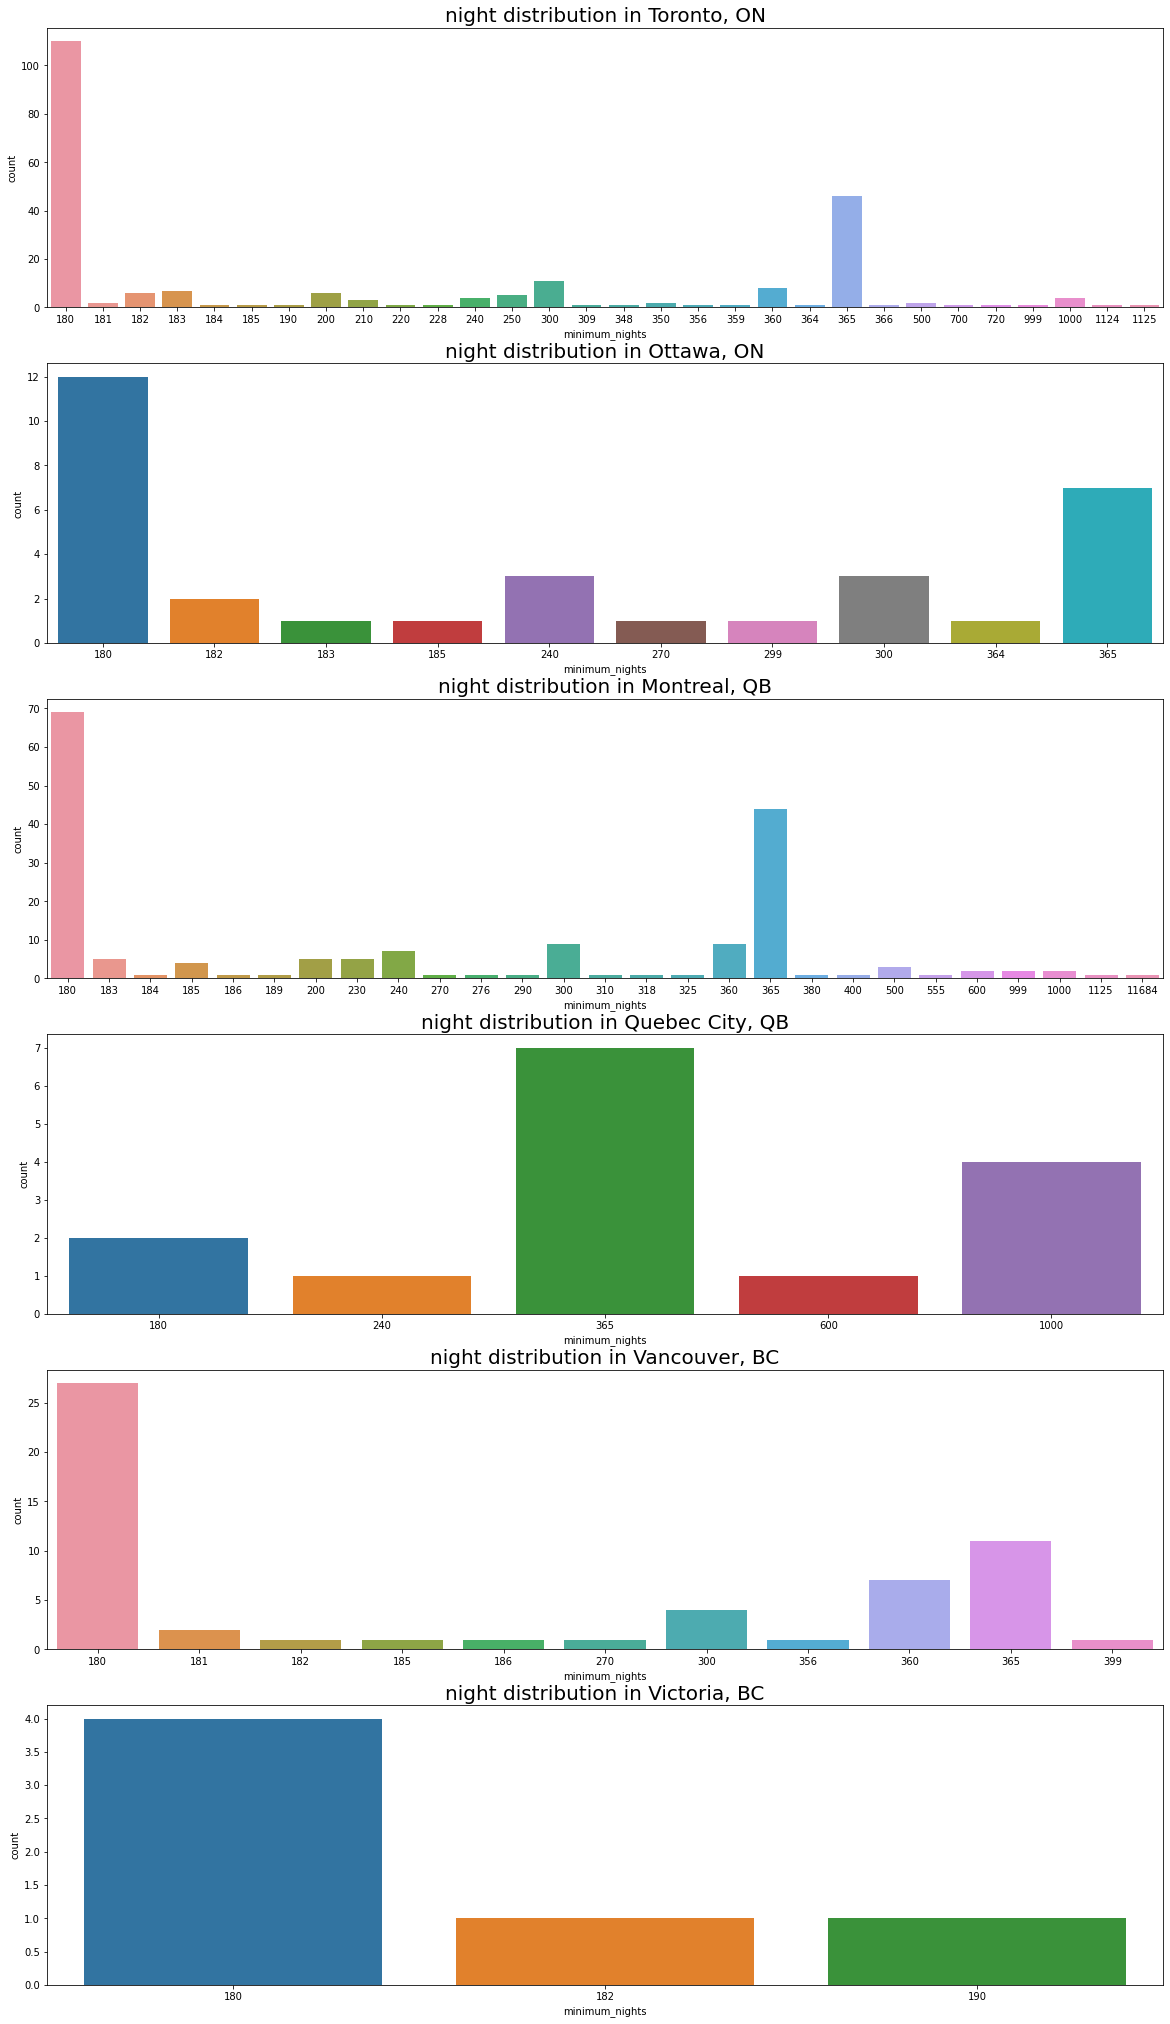

In [13]:
plt.figure(figsize=(20,36))




plt.subplot(6,1,1)
ax1 = sns.countplot(x='minimum_nights', data=toronto180)
plt.title("night distribution in Toronto, ON", fontsize=20)

plt.subplot(6,1,2)
ax2 = sns.countplot(x='minimum_nights', data=ottawa180)
plt.title("night distribution in Ottawa, ON", fontsize=20)

plt.subplot(6,1,3)
ax3 = sns.countplot(x='minimum_nights', data=montreal180)
plt.title("night distribution in Montreal, QB", fontsize=20)

plt.subplot(6,1,4)
ax4 = sns.countplot(x='minimum_nights', data=qbc180)
plt.title("night distribution in Quebec City, QB", fontsize=20)

plt.subplot(6,1,5)
ax5 = sns.countplot(x='minimum_nights', data=vancouver180)
plt.title("night distribution in Vancouver, BC", fontsize=20)

plt.subplot(6,1,6)
ax6 = sns.countplot(x='minimum_nights', data=victoria180)
plt.title("night distribution in Victoria, BC", fontsize=20)

plt.show()

<font size=4> From the above result, it can tell that Toronto, Montreal and Vancouver offered more options for people who wanted to stay more than six months, espeically 180 and 365 days, compared to the other three cities.

## Q1 : 3~6 months

<font size=4> Get the data from 90 to 180 days for these six cities.

In [14]:
toronto90 = toronto[(toronto['minimum_nights'] >=90) & (toronto['minimum_nights'] <180)]
ottawa90 = ottawa[(ottawa['minimum_nights'] >=90) & (ottawa['minimum_nights'] <180)]
montreal90 = montreal[(montreal['minimum_nights'] >= 90) & (montreal['minimum_nights'] < 180)]
qbc90 = qbc[(qbc['minimum_nights'] >=90) & (qbc['minimum_nights'] <180)]
vancouver90 = vancouver[(vancouver['minimum_nights'] >=90) & (vancouver['minimum_nights'] <180)]
victoria90 = victoria[(victoria['minimum_nights'] >=90) & (victoria['minimum_nights'] <180)]

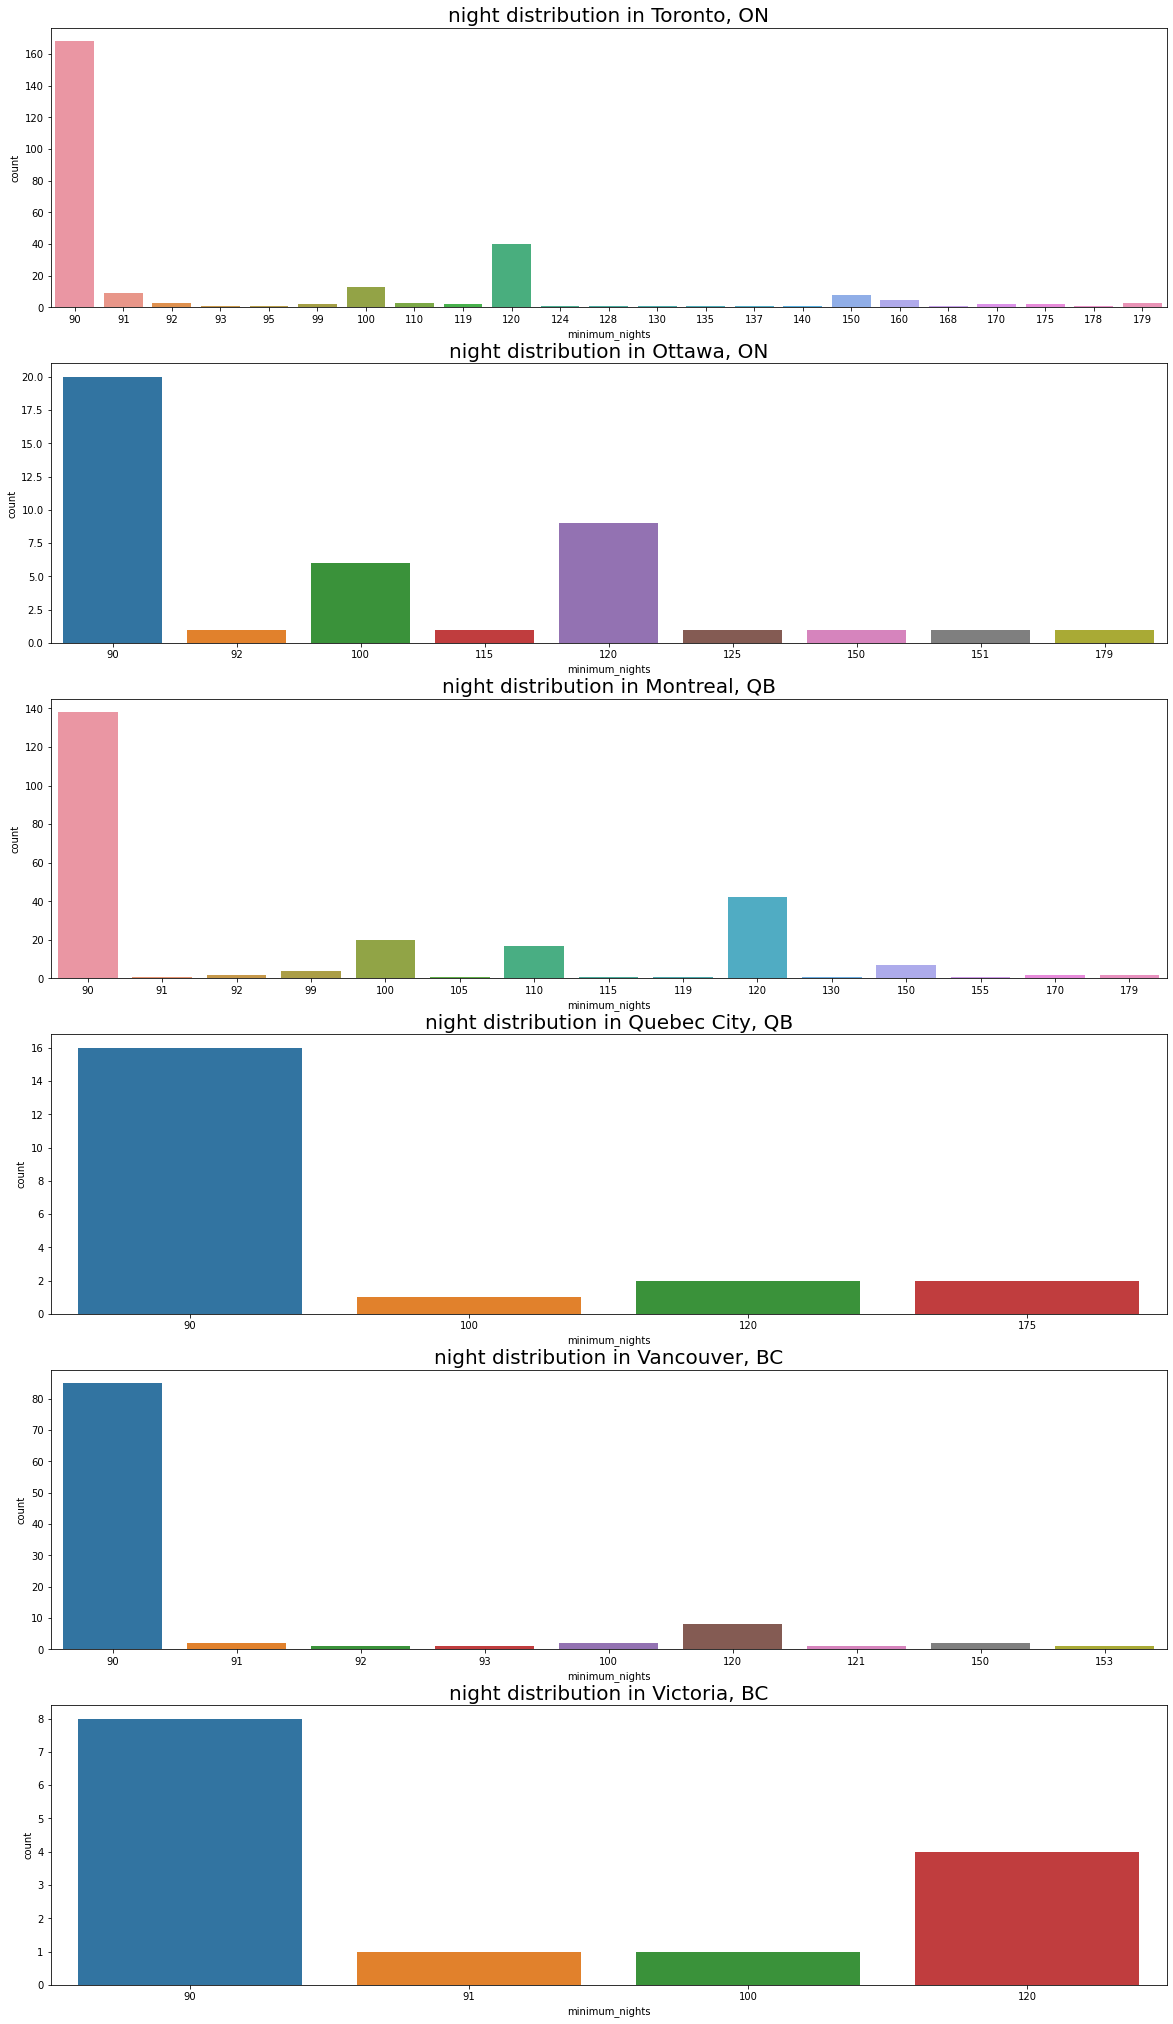

In [15]:
plt.figure(figsize=(20,36))

plt.subplot(6,1,1)
ax1 = sns.countplot(x='minimum_nights', data=toronto90)
plt.title("night distribution in Toronto, ON", fontsize=20)

plt.subplot(6,1,2)
ax2 = sns.countplot(x='minimum_nights', data=ottawa90)
plt.title("night distribution in Ottawa, ON", fontsize=20)

plt.subplot(6,1,3)
ax3 = sns.countplot(x='minimum_nights', data=montreal90)
plt.title("night distribution in Montreal, QB", fontsize=20)

plt.subplot(6,1,4)
ax4 = sns.countplot(x='minimum_nights', data=qbc90)
plt.title("night distribution in Quebec City, QB", fontsize=20)

plt.subplot(6,1,5)
ax5 = sns.countplot(x='minimum_nights', data=vancouver90)
plt.title("night distribution in Vancouver, BC", fontsize=20)

plt.subplot(6,1,6)
ax6 = sns.countplot(x='minimum_nights', data=victoria90)
plt.title("night distribution in Victoria, BC", fontsize=20)

plt.show()

<font size=4> Similarly, it can tell that Toronto, Montreal and Vancouver offered more options for people who wanted to stay 3 to 6 months. 90 days and 120 days are two popular options.

## Q2 : mian focus cities

### Toronto

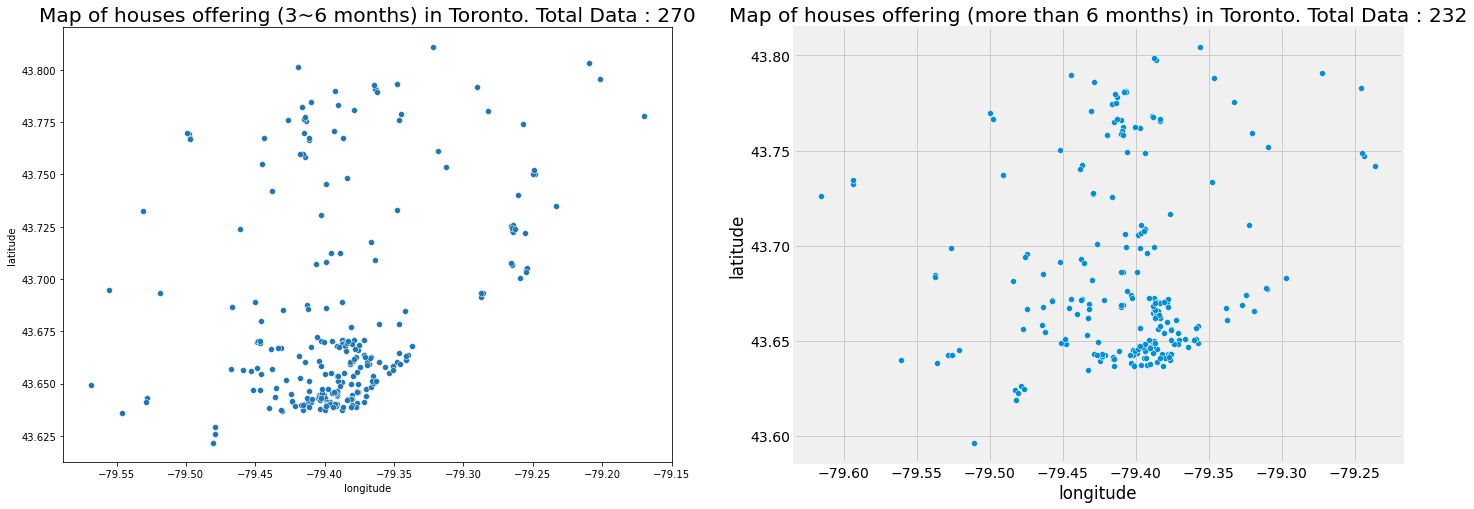

In [16]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.style.use('fivethirtyeight')
plt.title('Map of houses offering (3~6 months) in Toronto. Total Data : {}'.format(len(toronto90)))
sns.scatterplot(x='longitude', y='latitude', data=toronto90)

plt.subplot(1,2,2)
plt.style.use('fivethirtyeight')
plt.title('Map of houses offering (more than 6 months) in Toronto. Total Data : {}'.format(len(toronto180)))
sns.scatterplot(x='longitude', y='latitude', data=toronto180)

plt.show()

<font size=4> These houses in Toronto offering long-term choices, whether for 3 to 6 months or more, are mostly located between -79.45-79.35 longitude and 43.62~43.67 latitude. Therefore I will combine these two datasets together.

In [17]:
toronto_more90 = pd.concat([toronto90, toronto180], axis=0)

### Montreal

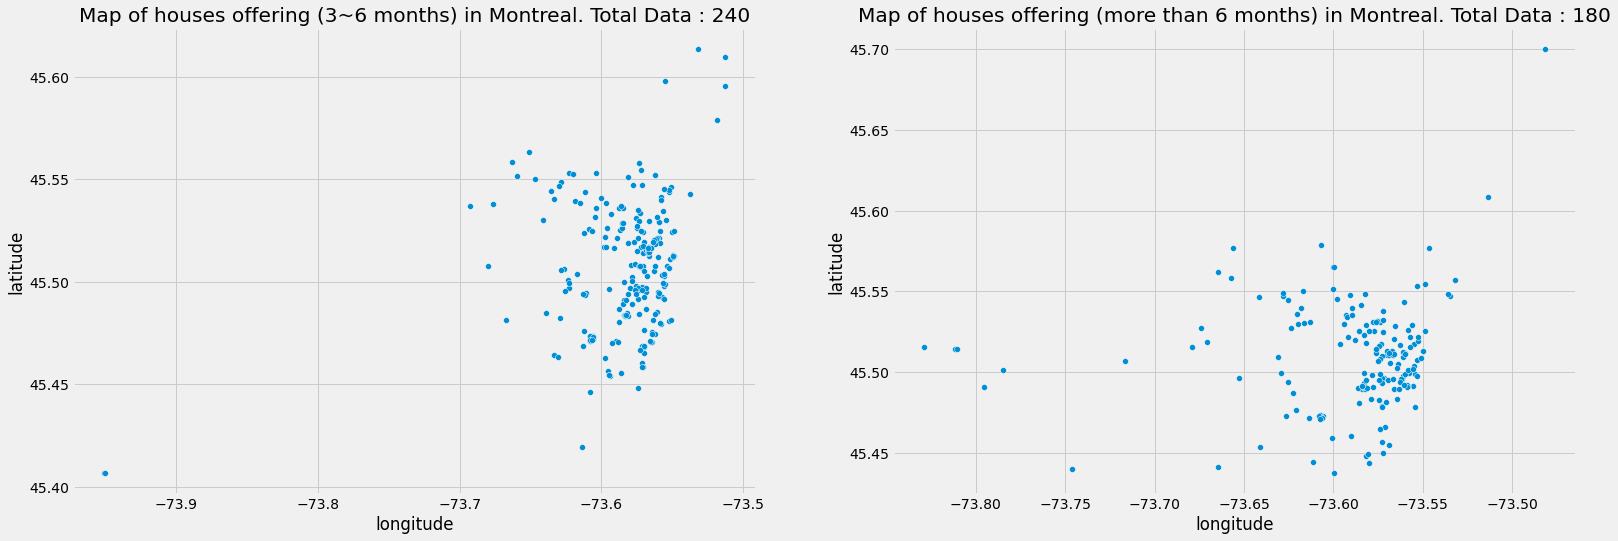

In [18]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.style.use('fivethirtyeight')
plt.title('Map of houses offering (3~6 months) in Montreal. Total Data : {}'.format(len(montreal90)))
sns.scatterplot(x='longitude', y='latitude', data=montreal90)

plt.subplot(1,2,2)
plt.style.use('fivethirtyeight')
plt.title('Map of houses offering (more than 6 months) in Montreal. Total Data : {}'.format(len(montreal180)))
sns.scatterplot(x='longitude', y='latitude', data=montreal180)

plt.show()

<font size=4> These houses in Montreal offering long-term choices, whether for 3 to 6 months or more, are mostly located between -73.60 to -73.55 latitude and 45.45 to 45.55 longitude. Therefore I will combine these two datasets together.

In [19]:
montreal_more90 = pd.concat([montreal90, montreal180], axis=0)

### Vancouver

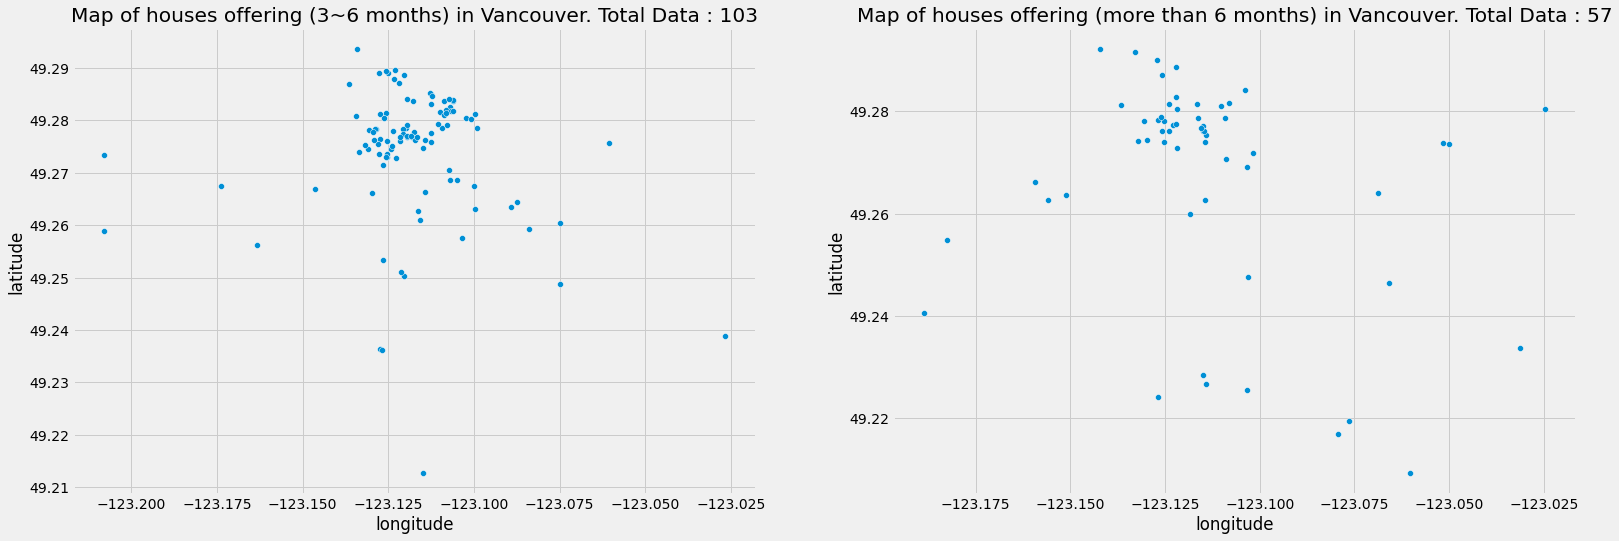

In [20]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.style.use('fivethirtyeight')
plt.title('Map of houses offering (3~6 months) in Vancouver. Total Data : {}'.format(len(vancouver90)))
sns.scatterplot(x='longitude', y='latitude', data=vancouver90)

plt.subplot(1,2,2)
plt.style.use('fivethirtyeight')
plt.title('Map of houses offering (more than 6 months) in Vancouver. Total Data : {}'.format(len(vancouver180)))
sns.scatterplot(x='longitude', y='latitude', data=vancouver180)

plt.show()

<font size=4> These houses in Vancouver offer long-term choices, whether for 3 to 6 months or more, are mostly located between -123.1 to -123.125 latitude and 49.26 to 49.29 longitude. Therefore I will combine these two datasets together.

In [21]:
vancouver_more90 = pd.concat([vancouver90, vancouver180], axis=0)

# Q1 : month rent

<font size=4> get the data with minimum nights less than 30 days.

In [22]:
toronto_small30 = toronto[toronto['minimum_nights'] <= 30]
ottawa_small30 = ottawa[ottawa['minimum_nights'] <= 30]
montreal_small30 = montreal[montreal['minimum_nights'] <= 30]
qbc_small30 = qbc[qbc['minimum_nights'] <= 30]
vancouver_small30 = vancouver[vancouver['minimum_nights'] <= 30]
victoria_small30 = victoria[victoria['minimum_nights'] <= 30]

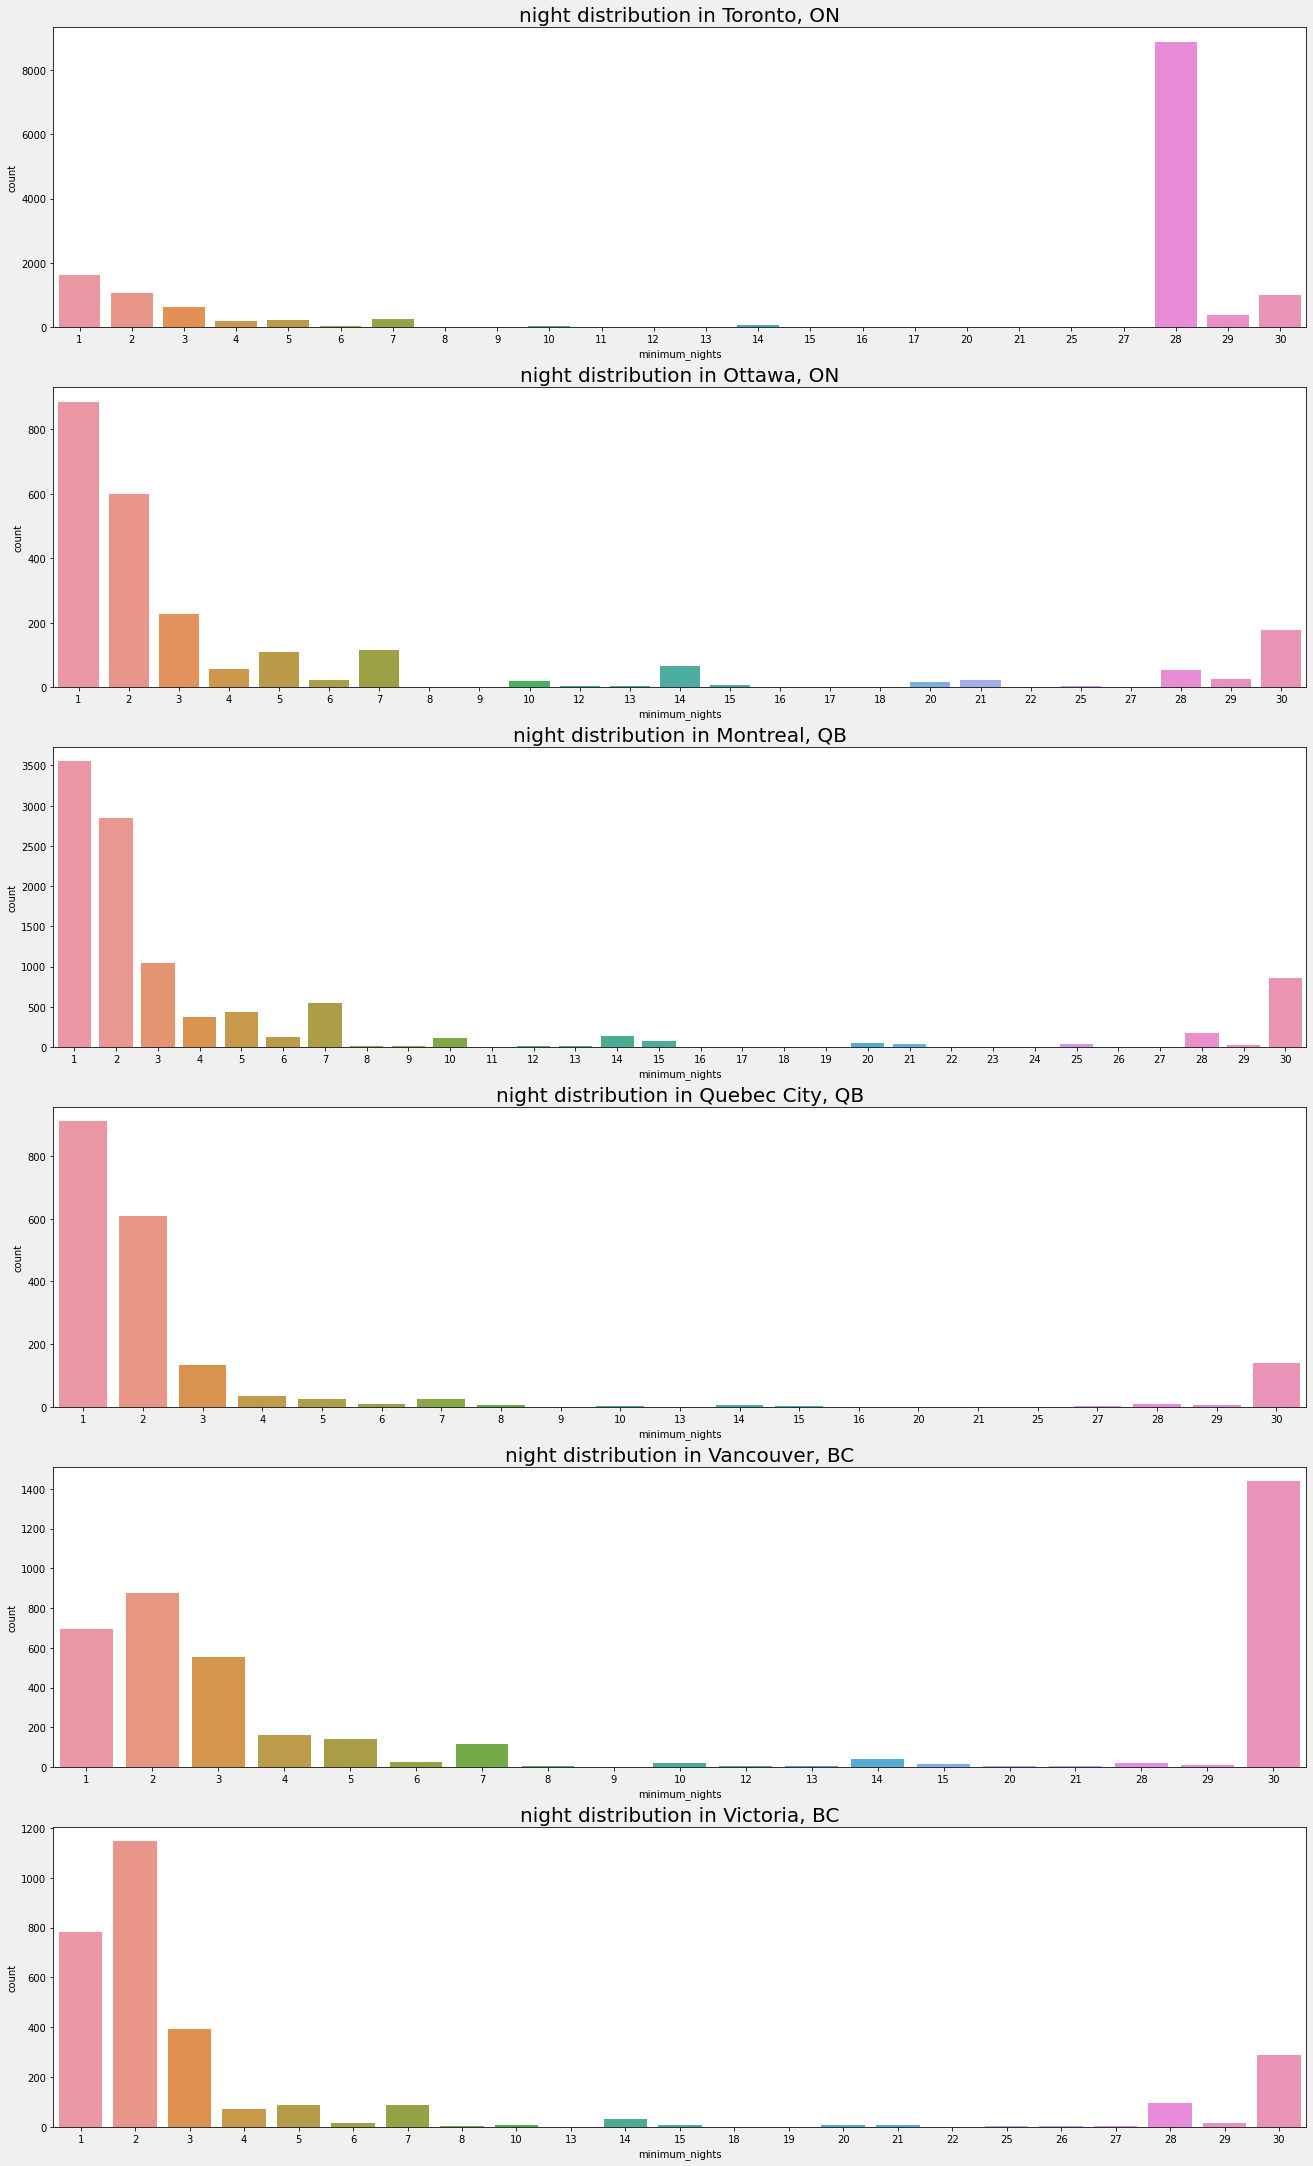

In [23]:
plt.figure(figsize=(20,36))

plt.style.use("default")


plt.subplot(6,1,1)
ax1 = sns.countplot(x='minimum_nights', data=toronto_small30)
plt.title("night distribution in Toronto, ON", fontsize=20)

plt.subplot(6,1,2)
ax2 = sns.countplot(x='minimum_nights', data=ottawa_small30)
plt.title("night distribution in Ottawa, ON", fontsize=20)


plt.subplot(6,1,3)
ax3 = sns.countplot(x='minimum_nights', data=montreal_small30)
plt.title("night distribution in Montreal, QB", fontsize=20)

plt.subplot(6,1,4)
ax4 = sns.countplot(x='minimum_nights', data=qbc_small30)
plt.title("night distribution in Quebec City, QB", fontsize=20)


plt.subplot(6,1,5)
ax5 = sns.countplot(x='minimum_nights', data=vancouver_small30)
plt.title("night distribution in Vancouver, BC", fontsize=20)

plt.subplot(6,1,6)
ax6 = sns.countplot(x='minimum_nights', data=victoria_small30)
plt.title("night distribution in Victoria, BC", fontsize=20)

plt.show()

<font size=4> Among these six cities in Canada, Toronto, Montreal and Vacouver offered more houses whose minimum nights requirements approximate a month, and these percentage of these monthly types are higher than short-term options(less than a week) in Toronto and Vancouver. Montreal and Vancouver both offer more 30 days options, whereas that in Toronto is 28 days. Therefore, I will get the data for these three cites based on the most(28 for Toronto, 30 for Montreal and Vancouver) as the monthly datasets.

## Q2 : main focus cities

### Toronto

In [24]:
toronto30 = toronto[(toronto['minimum_nights'] == 28)]

<AxesSubplot:title={'center':'Map of houses offering  in Toronto. Total Data : 8872'}, xlabel='longitude', ylabel='latitude'>

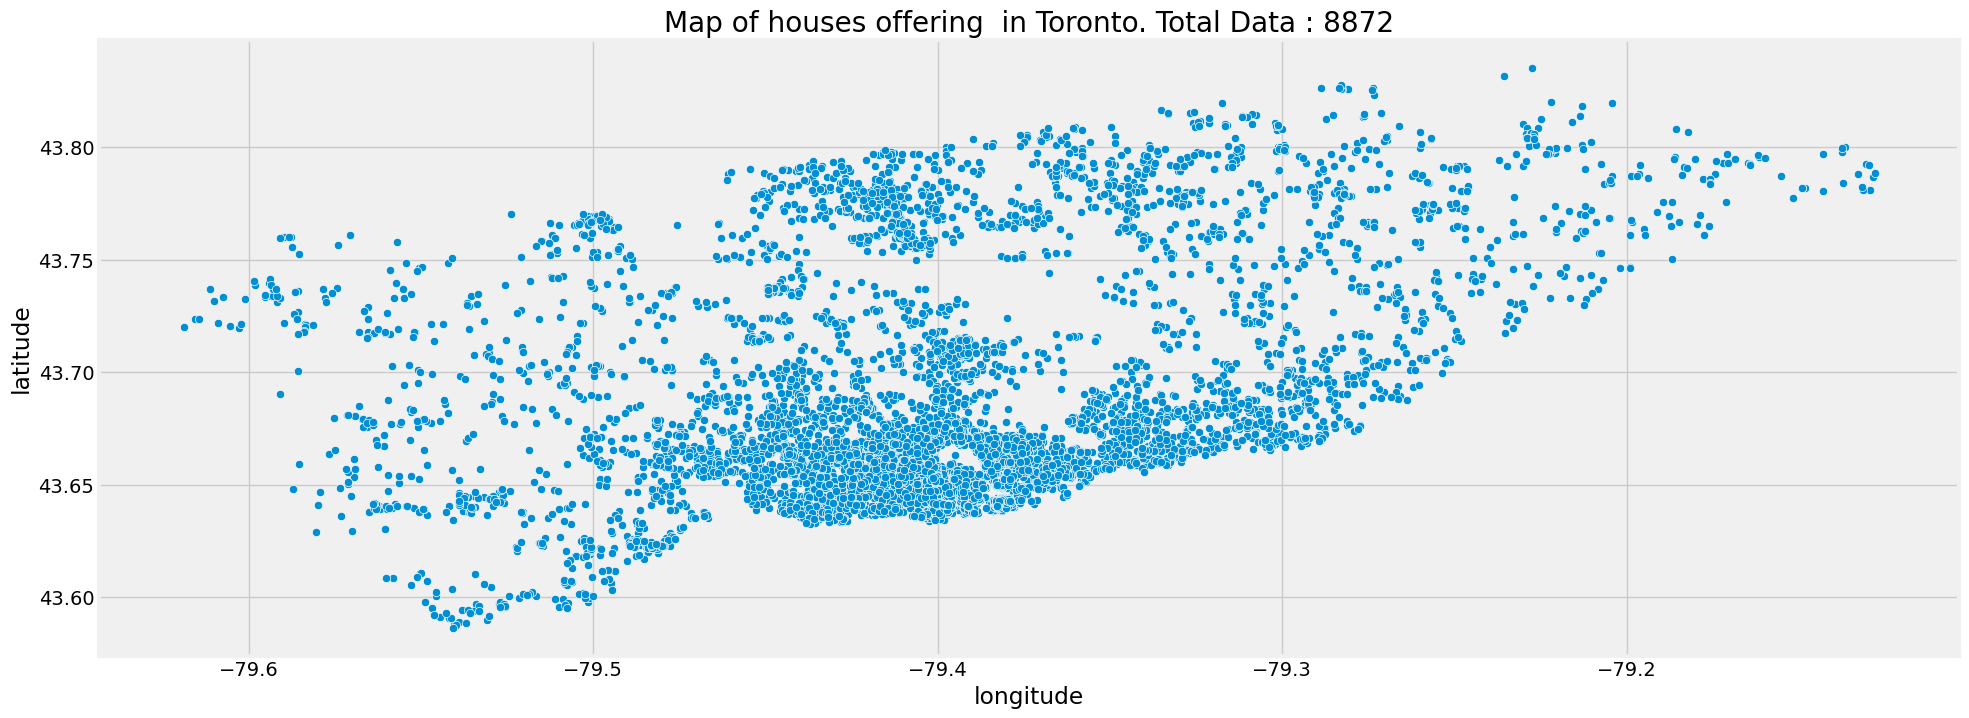

In [25]:
plt.figure(figsize=(24,8))

plt.style.use('fivethirtyeight')
plt.title('Map of houses offering  in Toronto. Total Data : {}'.format(len(toronto30)))
sns.scatterplot(x='longitude', y='latitude', data=toronto30)

<font size=4> Different from seasonal or longer optnios, there is no specific area for monthly options in Toronto.

### Montreal

In [26]:
montreal30 = montreal[montreal['minimum_nights'] == 30]

<AxesSubplot:title={'center':'Map of houses offering  in Montreal. Total Data : 861'}, xlabel='longitude', ylabel='latitude'>

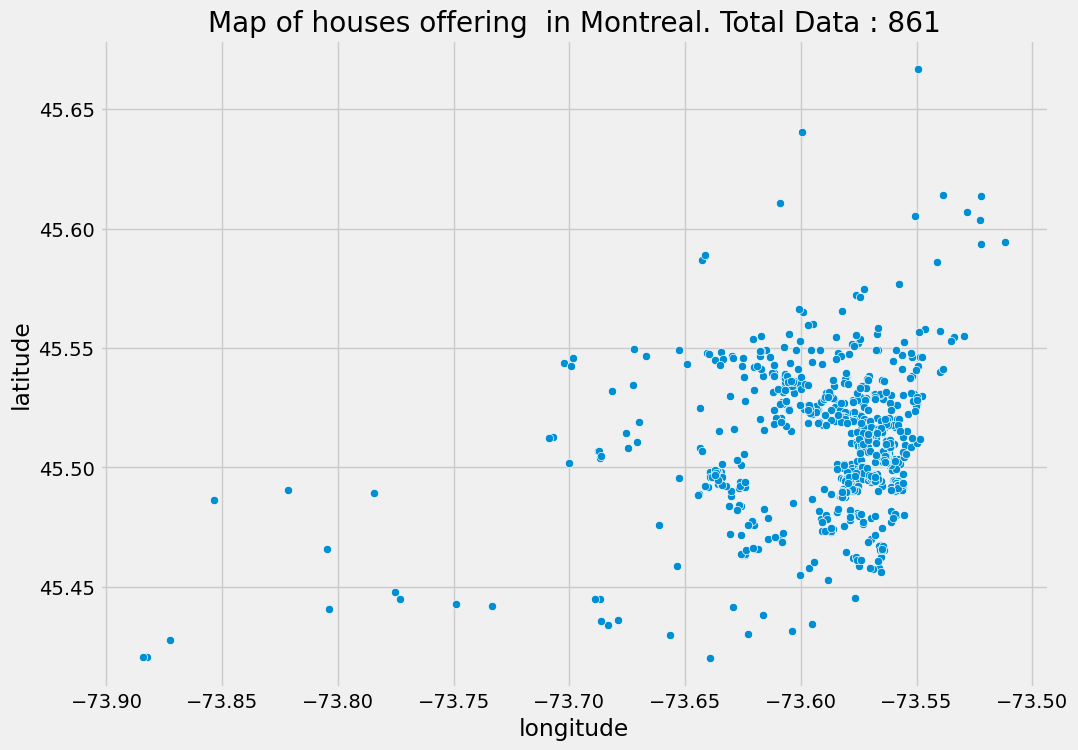

In [27]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.style.use('fivethirtyeight')
plt.title('Map of houses offering  in Montreal. Total Data : {}'.format(len(montreal30)))
sns.scatterplot(x='longitude', y='latitude', data=montreal30)

<font size=4> The distribution of these hotels in Montreal are similar, regardless of monthly option or the longer one.

### Vancouver

In [28]:
vancouver30 = vancouver[vancouver['minimum_nights'] ==30]

<AxesSubplot:title={'center':'Map of houses offering  in Vancouver. Total Data : 1438'}, xlabel='longitude', ylabel='latitude'>

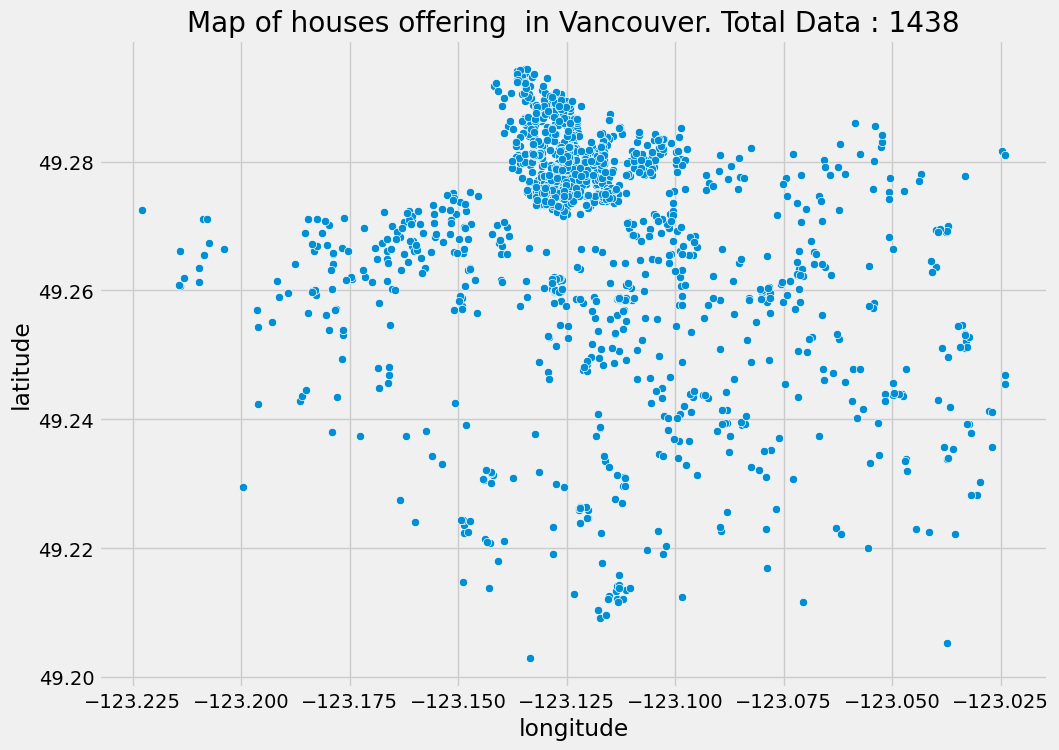

In [29]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.style.use('fivethirtyeight')
plt.title('Map of houses offering  in Vancouver. Total Data : {}'.format(len(vancouver30)))
sns.scatterplot(x='longitude', y='latitude', data=vancouver30)

<font size=4> The main location of the monthly house in Vancouver is -123.125 longitude and 49.28 latitude, but some hotels still can be found in other regions in Vancouver.

<font size=4> More discovery on neighbourhood will be in section 5.2

# Comparsion

## Q3 : travel time

<font size=4> travel time will be based on last review columns. Due to the regulation from airbnb, customers need to give their reviews after checkout within 14 days. Therefore, the month with the last customers gave their reviews can view as the months these customers **checked out**. However, if the hotel has the restictions on minimum nights longer than a month, the month of last review will **not** the month they **checked in**, and thus I needed to build a columns to show the time they checked in. It is noticed that this problem only happened in minimum nights more than 30 days, assuming that people who rented a place **less than a month** checked in and checked out **in the same month** The following points atre the assumption while doing traveling time analysis
    
1. People who wanted to rent a place for a season will find a place with minimum nights approximate 90 days, instead of renting a place with a minimum 30 nights three times. Same for longer options.
2. People who rented a place for a month check in and check out **in the same month**.
3. Regarding to data that people who rented a place longer than a month (here only focus on more than 90 days), the time they checked in should be calculated.

In [30]:
import datetime

In [31]:
def time_change(x):
    time = datetime.timedelta(int(x))
    return time

In [32]:
toronto_more90['minimum_nights'] = toronto_more90['minimum_nights'].apply(time_change)
toronto_more90['checkin'] = toronto_more90['last_review'] - toronto_more90['minimum_nights']
toronto_more90['checkin_month'] = toronto_more90['checkin'].dt.month

In [33]:
montreal_more90['minimum_nights'] = montreal_more90['minimum_nights'].apply(time_change)
montreal_more90['checkin'] = montreal_more90['last_review'] - montreal_more90['minimum_nights']
montreal_more90['checkin_month'] = montreal_more90['checkin'].dt.month

In [34]:
vancouver_more90['minimum_nights'] = vancouver_more90['minimum_nights'].apply(time_change)
vancouver_more90['checkin'] = vancouver_more90['last_review'] - vancouver_more90['minimum_nights']
vancouver_more90['checkin_month'] = vancouver_more90['checkin'].dt.month

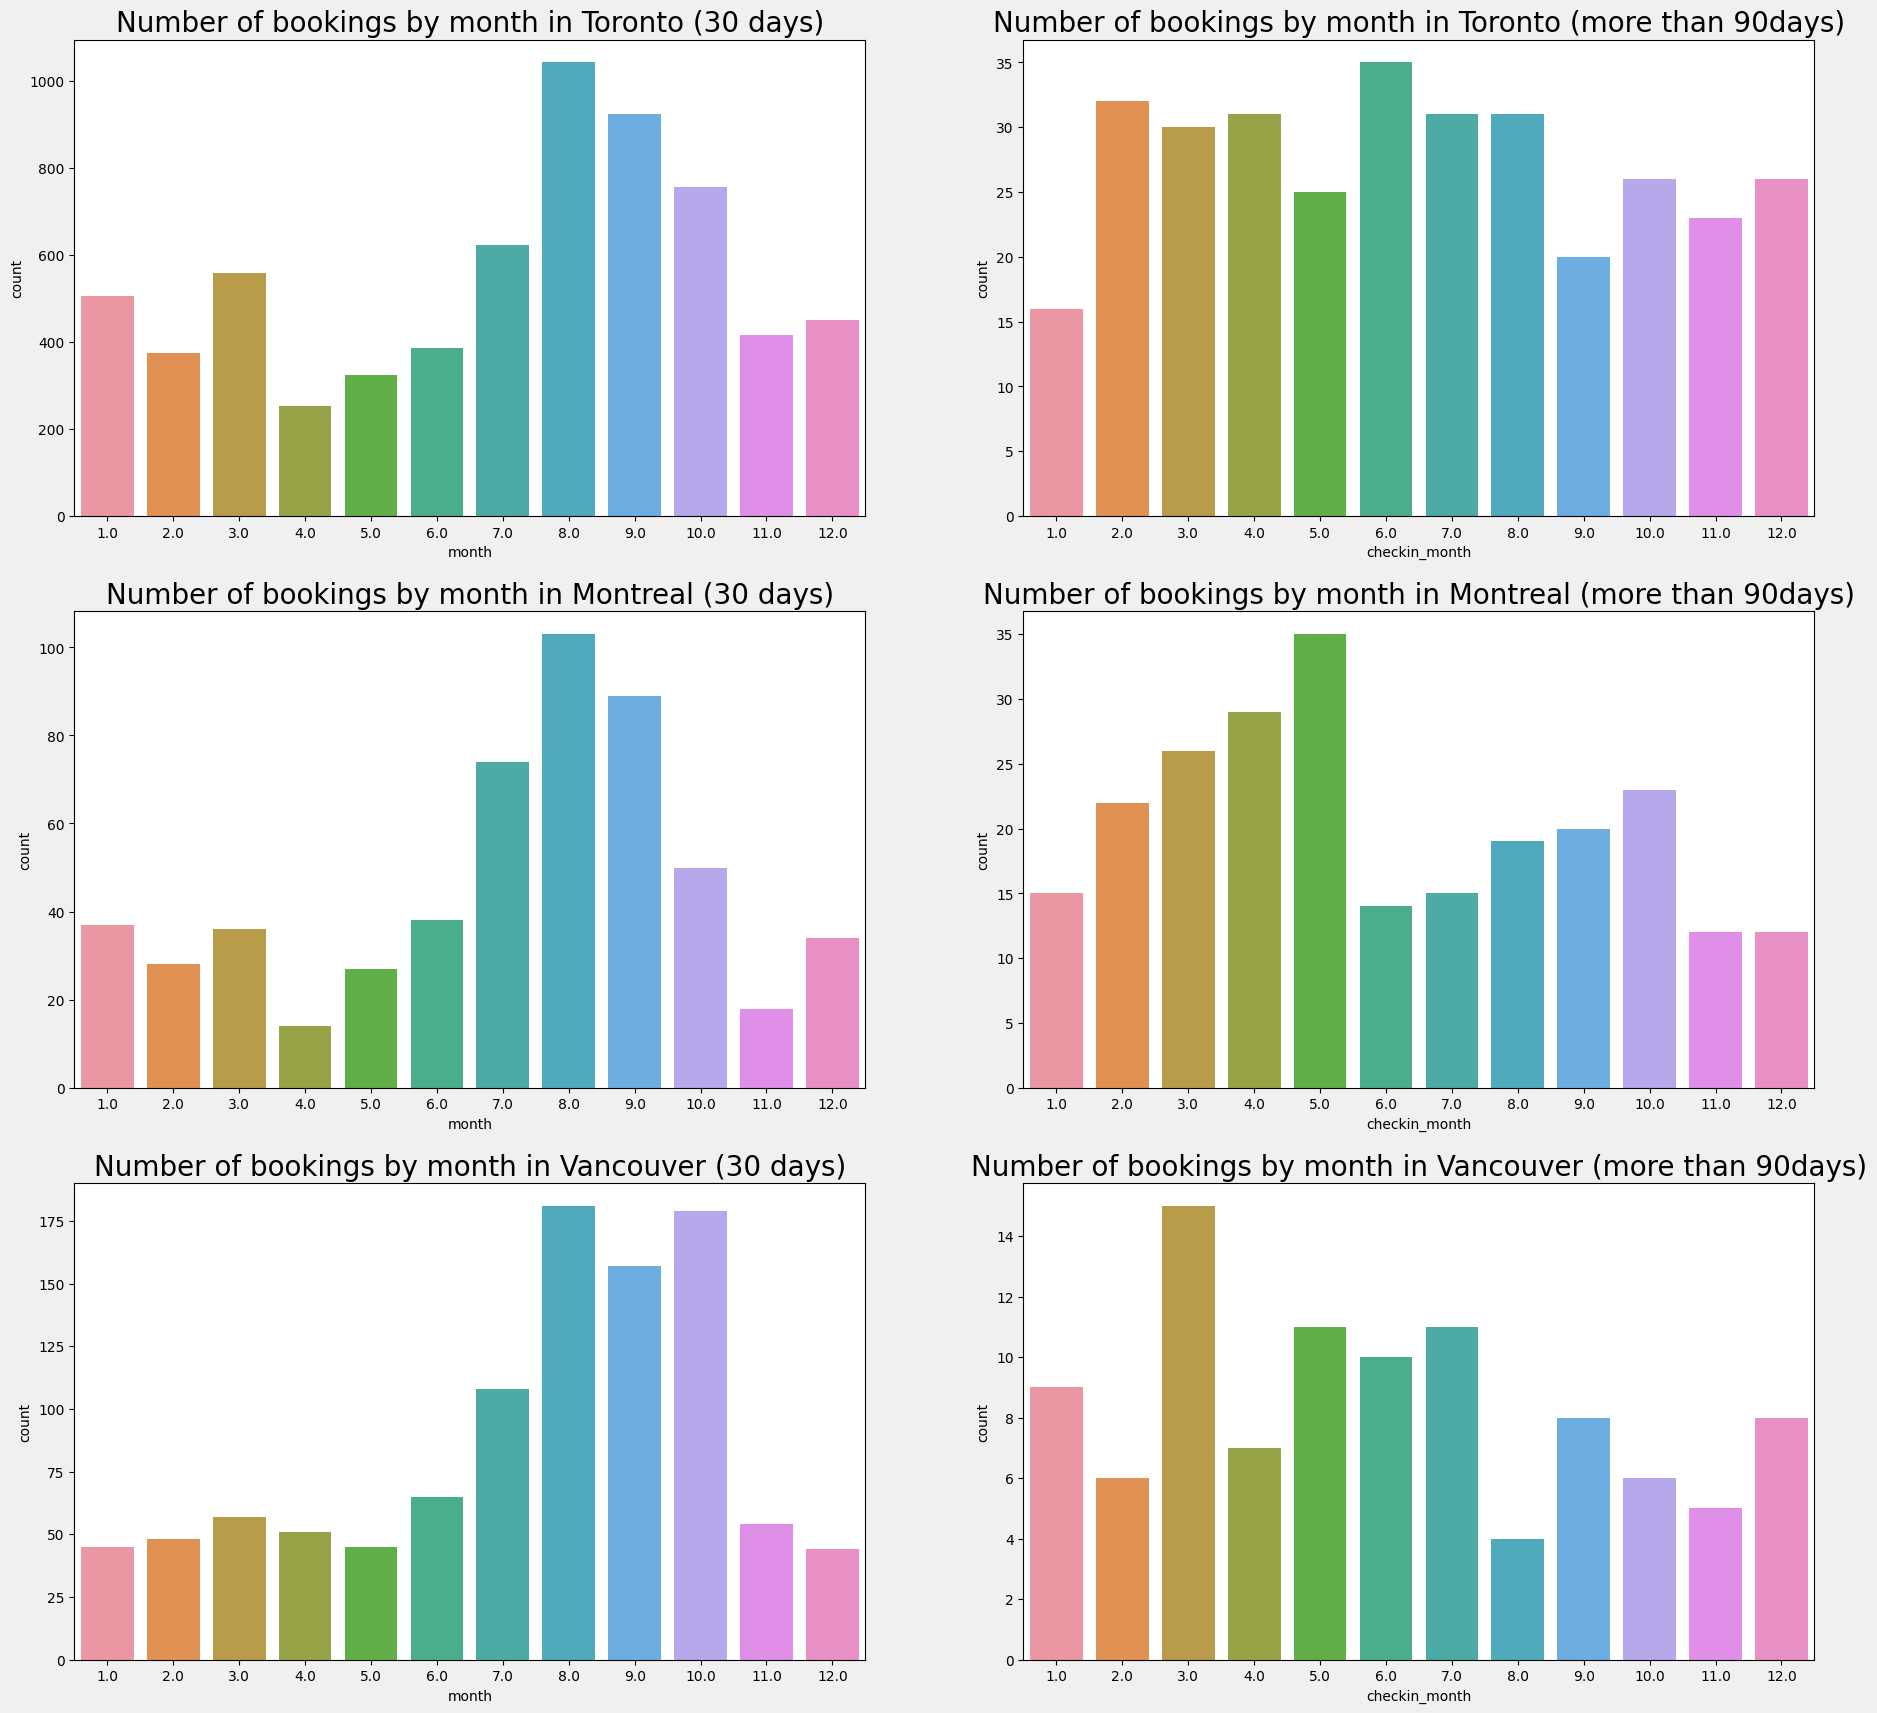

In [35]:
plt.figure(figsize=(20,20))
plt.style.use("default")

plt.subplot(3,2,1)
sns.countplot(x='month', data=toronto30)
plt.title("Number of bookings by month in Toronto (30 days)", fontsize=20)

plt.subplot(3,2,2)
sns.countplot(x='checkin_month', data=toronto_more90)
plt.title("Number of bookings by month in Toronto (more than 90days)", fontsize=20)

plt.subplot(3,2,3)
sns.countplot(x='month', data=montreal30)
plt.title("Number of bookings by month in Montreal (30 days)", fontsize=20)

plt.subplot(3,2,4)
sns.countplot(x='checkin_month', data=montreal_more90)
plt.title("Number of bookings by month in Montreal (more than 90days)", fontsize=20)

plt.subplot(3,2,5)
sns.countplot(x='month', data=vancouver30)
plt.title("Number of bookings by month in Vancouver (30 days)", fontsize=20)

plt.subplot(3,2,6)
sns.countplot(x='checkin_month', data=vancouver_more90)
plt.title("Number of bookings by month in Vancouver (more than 90days)", fontsize=20)

plt.show()

<font size=4> More people rented a house for a month in Toronto and Montreal from July to September, whereas the peak of this in Vancouver was October. If people rented a place by airbnb for more than 90 days, each month is possible for people to check in.

## Q4 : neighbourhood

### Toronto

In [36]:
print(toronto_more90['neighbourhood'].value_counts().head(10))

Waterfront Communities-The Island      109
Niagara                                 30
Church-Yonge Corridor                   27
Willowdale East                         22
Bay Street Corridor                     20
Dovercourt-Wallace Emerson-Junction     18
Little Portugal                         12
Annex                                   12
South Riverdale                         12
Moss Park                               11
Name: neighbourhood, dtype: int64


In [37]:
print(toronto30['neighbourhood'].value_counts().head(10))

Waterfront Communities-The Island      1417
Niagara                                 369
Annex                                   325
Church-Yonge Corridor                   307
Bay Street Corridor                     287
Trinity-Bellwoods                       246
Kensington-Chinatown                    232
Dovercourt-Wallace Emerson-Junction     230
Willowdale East                         204
Little Portugal                         203
Name: neighbourhood, dtype: int64


<font size=4> Among top ten popular neighbourhoods in Toronto, eight places are same between one month option and option longer than 90 days. Therefore, in the next section, I will pick up these 12 (20-8) neighbourhoods and make a comparsion with other neighbourhoods.

### Montreal

In [38]:
montreal_more90['neighbourhood'].value_counts().head(10)

Ville-Marie                             129
Le Plateau-Mont-Royal                    65
Le Sud-Ouest                             57
Côte-des-Neiges-Notre-Dame-de-Grâce      49
Villeray-Saint-Michel-Parc-Extension     22
Verdun                                   22
Rosemont-La Petite-Patrie                21
Mercier-Hochelaga-Maisonneuve            18
Ahuntsic-Cartierville                    10
Saint-Laurent                             5
Name: neighbourhood, dtype: int64

In [39]:
montreal30['neighbourhood'].value_counts().head(10)

Ville-Marie                             312
Le Plateau-Mont-Royal                   164
Le Sud-Ouest                            100
Côte-des-Neiges-Notre-Dame-de-Grâce      76
Rosemont-La Petite-Patrie                58
Villeray-Saint-Michel-Parc-Extension     32
Verdun                                   23
Mercier-Hochelaga-Maisonneuve            20
Outremont                                11
Saint-Laurent                            11
Name: neighbourhood, dtype: int64

<font size=4> Among top ten popular neighbourhoods in Montreal, night places are same between one month option and option longer than 90 days. Therefore, in the next section, I will pick up these 11 (20-9) neighbourhoods and make a comparsion with other neighbourhoods.

### Vancouver

In [40]:
vancouver_more90['neighbourhood'].value_counts().head(10)

Downtown                    82
Downtown Eastside           18
Mount Pleasant              14
West End                     8
South Cambie                 5
Kitsilano                    5
Fairview                     4
Hastings-Sunrise             3
Oakridge                     3
Kensington-Cedar Cottage     3
Name: neighbourhood, dtype: int64

In [41]:
vancouver30['neighbourhood'].value_counts().head(10)

Downtown                    494
West End                    243
Kitsilano                   109
Mount Pleasant               93
Fairview                     60
Kensington-Cedar Cottage     49
Downtown Eastside            49
Riley Park                   48
Renfrew-Collingwood          45
Grandview-Woodland           36
Name: neighbourhood, dtype: int64

<font size=4> Among top ten popular neighbourhoods in Vancouver, seven places are same between one month option and option longer than 90 days. However, the data is too few for those longer than 90 days. Therefore, in the next section, I will pick up these the top 10 neighbourhoods in a month option.

<font size=5> In section 3.3 and section 4.1, we can find that the distribution of houses in Toronto and Vancouver for a month is different from the longer one. However, look closely in neighbourhood, the top 10 neighbourhood seems like the same between these two options. Therefore, I suppose that monthly options are not specific to some regions just due to the more data we got. In these sepcific neighbourhood, the numbers of houses are still the most in Toronto and Vancouver.

## Q5 : price

<font size=4> In this section, two datasets, monthly and more than three months will be combined together. What the main focus in this section is make a compasion of prices between top regions and non-top regions.

### Toronto

In [42]:
#combine monthly and more thna three months lists
toronto_long = pd.concat([toronto30, toronto_more90], axis=0)

In [43]:
len(toronto_long)

9374

In [44]:
tor_places = ["Waterfront Communities-The Island","Niagara", "Church-Yonge Corridor",
             "Willowdale East", "Bay Street Corridor", "Dovercourt-Wallace Emerson-Junction",
             "Little Portugal", "South Riverdale", "Annex", "Moss Park", "Kensington-Chinatown",
              "Trinity-Bellwoods"]

toronto_topregion = toronto_long[toronto_long["neighbourhood"].apply(lambda x : x in tor_places)]
toronto_otherregion = toronto_long[toronto_long["neighbourhood"].apply(lambda x : x not in tor_places)]

In [45]:
toronto_topregion.describe().loc[:,'price']

count     4458.000000
mean       187.190893
std        520.636293
min          0.000000
25%         85.000000
50%        123.000000
75%        182.000000
max      13000.000000
Name: price, dtype: float64

In [46]:
toronto_otherregion.describe().loc[:,'price']

count     4916.000000
mean       119.767901
std        252.377452
min          0.000000
25%         50.000000
50%         80.000000
75%        125.000000
max      13000.000000
Name: price, dtype: float64

<font size=4> the prices of top regions were higher than non top regions, but the varience of the former one is higher as well.

In [47]:
# calculate the average prices and total houses offered of each neighbourhoods in top regions
topprice = toronto_topregion.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False)
topcount = toronto_topregion.groupby('neighbourhood').count()[['id']]
top = pd.concat([topprice,topcount], axis=1)

top = top.reset_index()
top = top.rename(columns={'index':'neighbourhood', 'id':'total_houses'})

In [48]:
# calculate the average prices and total houses offered of each neighbourhoods in non-btop regions
otherprice = toronto_otherregion.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False)
othercount = toronto_otherregion.groupby('neighbourhood').count()[['id']]
other = pd.concat([otherprice,othercount], axis=1)

other = other.reset_index()
other = other.rename(columns={'index':'neighbourhood', 'id':'total_houses'})

<font size=4> Data Visualization of price distribution

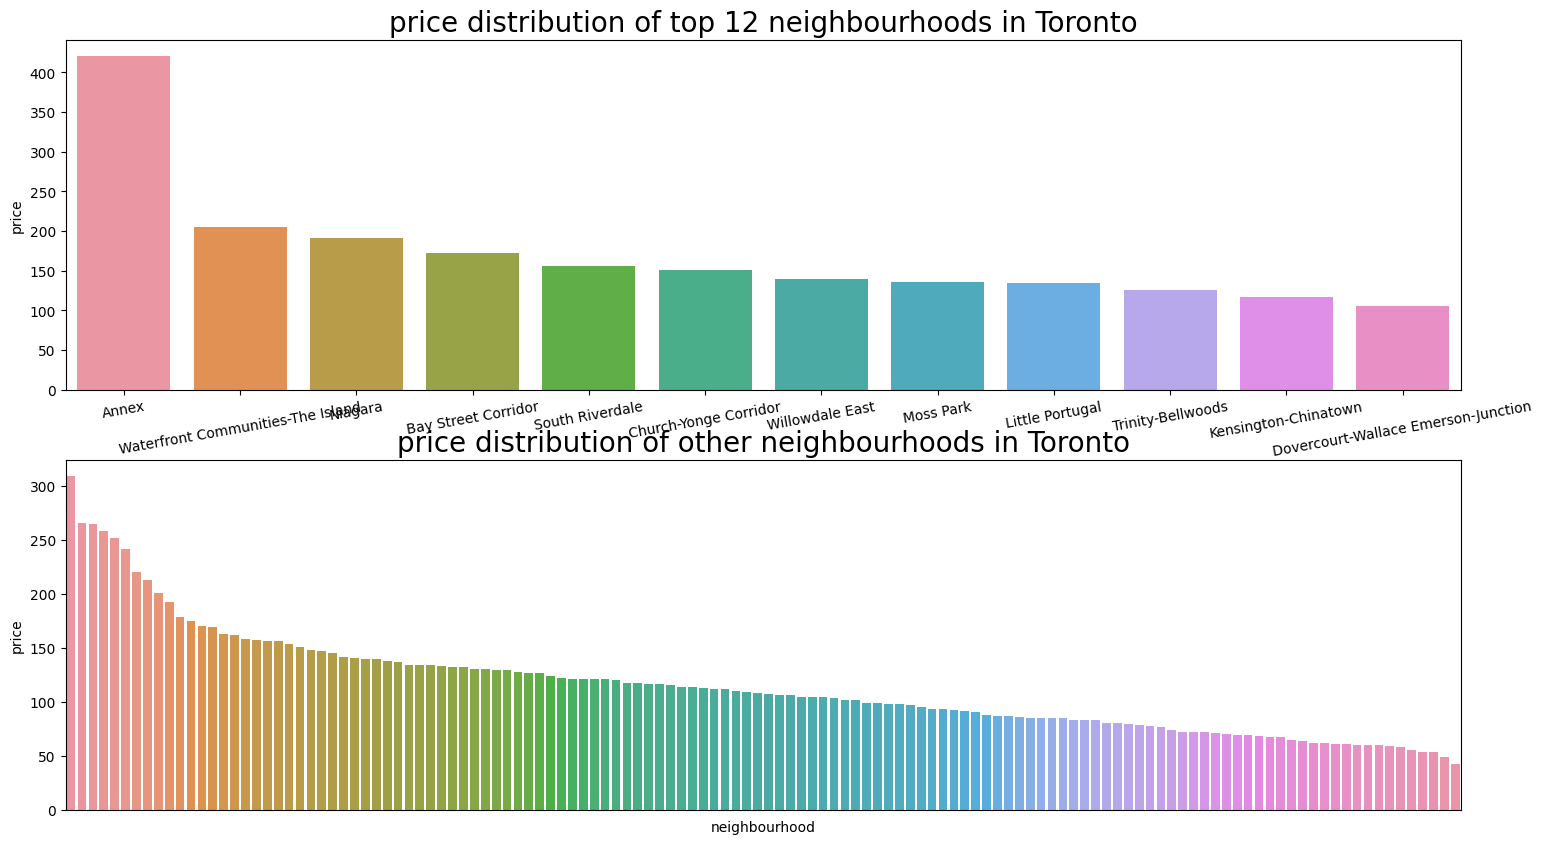

In [49]:
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
sns.barplot(x='neighbourhood', y='price', data=top)
plt.xticks(rotation=10)
plt.title('price distribution of top 12 neighbourhoods in Toronto', fontsize=20)

plt.subplot(2,1,2)
sns.barplot(x='neighbourhood', y='price', data=other)
plt.xticks([])
plt.title('price distribution of other neighbourhoods in Toronto', fontsize=20)

plt.show()

<font size=4> The prices in Annex neighbourhoods were significant higher than other popular regions, I assume this is the main reason to increase the average house prices in popular regions. In the below figure, it can illustrate that the higher prices in some non-popular neighbourhoods are higher than others. Therefore, in the next step, I am going to look at detailed table and find some difference.

In [50]:
toronto_topregion[toronto_topregion['neighbourhood'] !='Annex'].describe().loc[:,'price']

count     4121.000000
mean       168.111866
std        325.047229
min          0.000000
25%         85.000000
50%        125.000000
75%        182.000000
max      13000.000000
Name: price, dtype: float64

<font size=4> Exclude Annex, the house prices of popular regions are still higher than non popular regions, but the varience becomes smaller.

In [51]:
top.head()

,neighbourhood,price,total_houses
0,Annex,420.498516,337
1,Waterfront Communities-The Island,205.207733,1526
2,Niagara,190.889724,399
3,Bay Street Corridor,171.876221,307
4,South Riverdale,155.377246,167


In [52]:
top.sort_values('total_houses', ascending=False).head()

,neighbourhood,price,total_houses
1,Waterfront Communities-The Island,205.207733,1526
2,Niagara,190.889724,399
0,Annex,420.498516,337
5,Church-Yonge Corridor,151.143713,334
3,Bay Street Corridor,171.876221,307


<font size=4> According to above two tables, we can know that Annex is a comparatively expensive zone. Secondly, Waterfront Communities-The Island, Niagara, and Bay Street Corridor, all are in the top five expensive houses list as well as the numbers of houses offering list.

In [53]:
other.head(5)

,neighbourhood,price,total_houses
0,Beechborough-Greenbrook,309.000000,4
1,Forest Hill South,266.045455,22
2,Newtonbrook West,264.325843,89
3,Lawrence Park South,258.650000,20
4,Bayview Woods-Steeles,251.541667,24


In [54]:
other.sort_values('total_houses', ascending=False).head()

,neighbourhood,price,total_houses
5,Palmerston-Little Italy,241.259036,166
69,South Parkdale,104.183673,147
41,Mimico (includes Humber Bay Shores),127.576923,130
29,University,138.062992,127
18,Cabbagetown-South St.James Town,156.731707,123


<font size=4> non top popular regions in Toronto showed another trend. These neighbourhoods with higher house prices were few. There were only 4 houses in the expensive neighbourhood, Beechborough-Greenbrook. In contrast, the neighbourhood with more houses choices were more affordable. The prices of some locations are almost same as that of popular neighbourhoods(top 12). 

### Montreal

In [55]:
#combine monthly and more thna three months lists
montreal_long = pd.concat([montreal30, montreal_more90], axis=0)

In [56]:
len(montreal_long)

1281

In [57]:
tor_places = ["Ville-Marie","Le Plateau-Mont-Royal", "Le Sud-Ouest",
             "Côte-des-Neiges-Notre-Dame-de-Grâce", "Verdun", "Villeray-Saint-Michel-Parc-Extension",
             "Rosemont-La Petite-Patrie", "Mercier-Hochelaga-Maisonneuve", "Ahuntsic-Cartierville ", "Saint-Laurent",
              "Outremont"]

montreal_topregion = montreal_long[montreal_long["neighbourhood"].apply(lambda x : x in tor_places)]
montreal_otherregion = montreal_long[montreal_long["neighbourhood"].apply(lambda x : x not in tor_places)]

In [58]:
montreal_topregion.describe().loc[:,'price']

count     1199.000000
mean       139.911593
std        539.675121
min         15.000000
25%         55.000000
50%         85.000000
75%        111.500000
max      13294.000000
Name: price, dtype: float64

In [59]:
montreal_otherregion.describe().loc[:,'price']

count      82.000000
mean      125.841463
std       153.311550
min        20.000000
25%        45.250000
50%        79.000000
75%       125.000000
max      1000.000000
Name: price, dtype: float64

<font size=4> the prices of top regions were slightly higher than non top regions, but the varience of the former one is higher as well.

In [60]:
# calculate the average prices and total houses offered of each neighbourhoods in top regions
topprice = montreal_topregion.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False)
topcount = montreal_topregion.groupby('neighbourhood').count()[['id']]
top = pd.concat([topprice,topcount], axis=1)

top = top.reset_index()
top = top.rename(columns={'index':'neighbourhood', 'id':'total_houses'})

In [61]:
# calculate the average prices and total houses offered of each neighbourhoods in non-btop regions
otherprice = montreal_otherregion.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False)
othercount = montreal_otherregion.groupby('neighbourhood').count()[['id']]
other = pd.concat([otherprice,othercount], axis=1)

other = other.reset_index()
other = other.rename(columns={'index':'neighbourhood', 'id':'total_houses'})

<font size=4> Data Visualization of price distribution

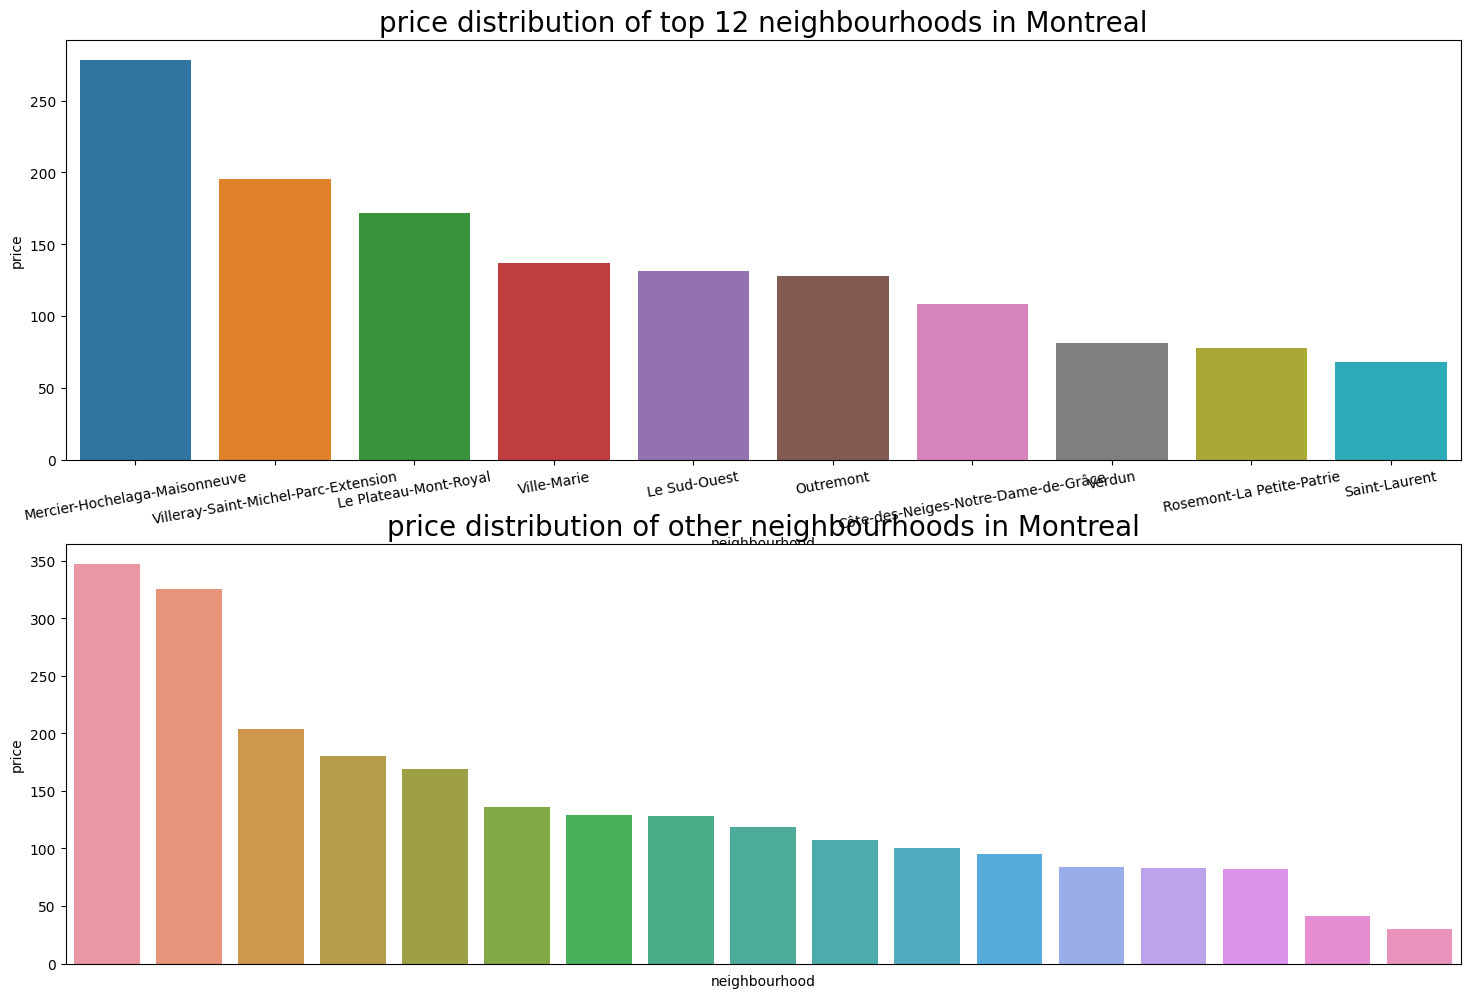

In [62]:
plt.figure(figsize=(18,12))

plt.subplot(2,1,1)
sns.barplot(x='neighbourhood', y='price', data=top)
plt.xticks(rotation=10)
plt.title('price distribution of top 12 neighbourhoods in Montreal', fontsize=20)

plt.subplot(2,1,2)
sns.barplot(x='neighbourhood', y='price', data=other)
plt.xticks([])
plt.title('price distribution of other neighbourhoods in Montreal', fontsize=20)

plt.show()

<font size=4> The prices in Mercier-Hochelaga-Maisonneuve neighbourhoods were significant higher than other popular regions, I assume this is the main reason to increase the average house prices in popular regions. In the below figure, it can illustrate that the higher prices in some non-popular neighbourhoods are higher than others. Therefore, in the next step, I am going to look at detailed table and find some difference.

In [63]:
montreal_topregion[montreal_topregion['neighbourhood'] !='Mercier-Hochelaga-Maisonneuve'].describe().loc[:,'price']

count     1161.000000
mean       135.370370
std        507.511701
min         15.000000
25%         55.000000
50%         85.000000
75%        112.000000
max      13294.000000
Name: price, dtype: float64

<font size=4> Exclude Mercier-Hochelaga-Maisonneuve, the house prices of popular regions are still higher than non popular regions, but the varience becomes smaller.

In [64]:
top.head()

,neighbourhood,price,total_houses
0,Mercier-Hochelaga-Maisonneuve,278.657895,38
1,Villeray-Saint-Michel-Parc-Extension,195.500000,54
2,Le Plateau-Mont-Royal,171.637555,229
3,Ville-Marie,136.795918,441
4,Le Sud-Ouest,131.675159,157


In [65]:
top.sort_values('total_houses', ascending=False).head()

,neighbourhood,price,total_houses
3,Ville-Marie,136.795918,441
2,Le Plateau-Mont-Royal,171.637555,229
4,Le Sud-Ouest,131.675159,157
6,Côte-des-Neiges-Notre-Dame-de-Grâce,108.120000,125
8,Rosemont-La Petite-Patrie,77.721519,79


<font size=4> According to above two tables, we can know that Le Plateau-Mont-Royal and Ville-Marie are both on the top 5 lists of expenisve houses as well as numbers of houses offered. The houses in Mercier-Hochelaga-Maisonneuve and Villeray-Saint-Michel-Parc-Extension are the top two expensive one, but the number of houses there are limited.

In [66]:
other.head(5)

,neighbourhood,price,total_houses
0,Côte-Saint-Luc,347.500000,2
1,Montréal-Nord,325.000000,4
2,Pierrefonds-Roxboro,203.400000,5
3,Dollard-des-Ormeaux,180.000000,3
4,Rivière-des-Prairies-Pointe-aux-Trembles,168.666667,3


In [67]:
other.sort_values('total_houses', ascending=False).head()

,neighbourhood,price,total_houses
12,Ahuntsic-Cartierville,84.238095,21
14,LaSalle,82.400000,10
5,Westmount,136.166667,6
6,Lachine,129.166667,6
2,Pierrefonds-Roxboro,203.400000,5


<font size=4>Except for popular neighbourhood in Montreal, there were very limited houses available but some of them were extremely expensive. 

### Vancouver

In [68]:
#combine monthly and more thna three months lists
vancouver_long = pd.concat([vancouver30, vancouver_more90], axis=0)

In [69]:
len(vancouver_long)

1598

In [70]:
tor_places = ["Downtown", "Downtown Eastside", "Mount Pleasant", "West End", "South Cambie", "Kitsilano", "Fairview",                    
            "Hastings-Sunrise", "Oakridge", "Kensington-Cedar Cottage"]

vancouver_topregion = vancouver_long[vancouver_long["neighbourhood"].apply(lambda x : x in tor_places)]
vancouver_otherregion = vancouver_long[vancouver_long["neighbourhood"].apply(lambda x : x not in tor_places)]

In [71]:
vancouver_topregion.describe().loc[:,'price']

count    1319.000000
mean      154.615618
std       235.675068
min        25.000000
25%        90.000000
50%       120.000000
75%       160.000000
max      6500.000000
Name: price, dtype: float64

In [72]:
vancouver_otherregion.describe().loc[:,'price']

count     279.000000
mean      204.125448
std       719.651836
min        20.000000
25%        62.000000
50%        99.000000
75%       149.000000
max      9999.000000
Name: price, dtype: float64

<font size=4> the prices of top regions were slightly higher than non top regions, but the varience of the former one is higher as well.

In [73]:
# calculate the average prices and total houses offered of each neighbourhoods in top regions
topprice = vancouver_topregion.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False)
topcount = vancouver_topregion.groupby('neighbourhood').count()[['id']]
top = pd.concat([topprice,topcount], axis=1)

top = top.reset_index()
top = top.rename(columns={'index':'neighbourhood', 'id':'total_houses'})

In [74]:
# calculate the average prices and total houses offered of each neighbourhoods in non-btop regions
otherprice = vancouver_otherregion.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False)
othercount = vancouver_otherregion.groupby('neighbourhood').count()[['id']]
other = pd.concat([otherprice,othercount], axis=1)

other = other.reset_index()
other = other.rename(columns={'index':'neighbourhood', 'id':'total_houses'})

<font size=4> Data Visualization of price distribution

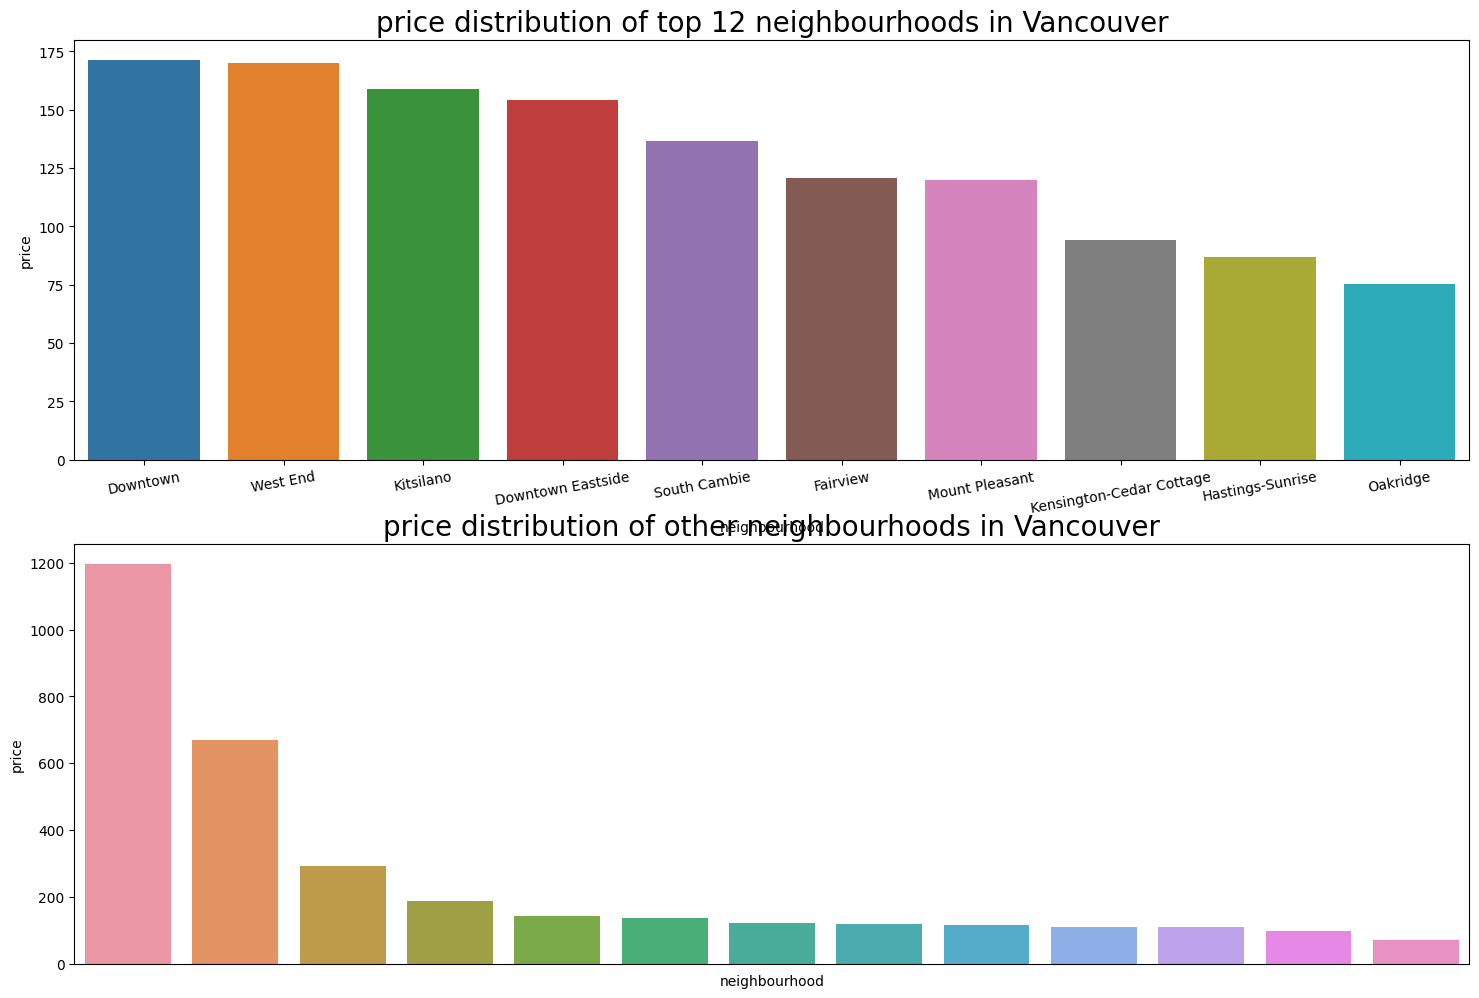

In [75]:
plt.figure(figsize=(18,12))

plt.subplot(2,1,1)
sns.barplot(x='neighbourhood', y='price', data=top)
plt.xticks(rotation=10)
plt.title('price distribution of top 12 neighbourhoods in Vancouver', fontsize=20)

plt.subplot(2,1,2)
sns.barplot(x='neighbourhood', y='price', data=other)
plt.xticks([])
plt.title('price distribution of other neighbourhoods in Vancouver', fontsize=20)

plt.show()

<font size=4> The prices in some neighbourhoods which were not in the top ten lists were crazy expenisive. In the next step, I am going to discover them.

In [76]:
top.head()

,neighbourhood,price,total_houses
0,Downtown,171.498264,576
1,West End,169.916335,251
2,Kitsilano,158.771930,114
3,Downtown Eastside,154.358209,67
4,South Cambie,136.384615,26


In [77]:
top.sort_values('total_houses', ascending=False).head()

,neighbourhood,price,total_houses
0,Downtown,171.498264,576
1,West End,169.916335,251
2,Kitsilano,158.771930,114
6,Mount Pleasant,120.018692,107
3,Downtown Eastside,154.358209,67


<font size=4> According to above two tables, the neighbourhoods in Vancouver which offered the most houses were exact the location of the expenisive houses.

In [78]:
other.head(5)

,neighbourhood,price,total_houses
0,Arbutus Ridge,1197.500000,10
1,West Point Grey,670.555556,18
2,Dunbar Southlands,293.238095,21
3,Shaughnessy,188.181818,11
4,Strathcona,143.222222,9


In [79]:
other.sort_values('total_houses', ascending=False).head()

,neighbourhood,price,total_houses
8,Riley Park,114.959184,49
10,Renfrew-Collingwood,108.276596,47
9,Grandview-Woodland,110.105263,38
6,Marpole,120.227273,22
2,Dunbar Southlands,293.238095,21


<font size=4> The houses in Arbutus Ridge and West Point Grey were extremely expensive, yet only few houses were available there.

# Conclusion

<font size=4> the following points are my conclusions<br>
    1. Among these six cities, Toronto, Montreal and Vancouver offer more long-term renting options. Based on this, I assume that bigger cities are more possible to have the market in long-term renting.
    
    2. For monthly renting, there were hot seasons in Toronto, Montreal and Vancouver, but this phenomenon was not seen in the markets for more than 90 days rent.
    
    3. The average renting prices in Toronto was higher than that of Montreal and Vancouver.
    
    4. In Toronto, regardless of monthly options or longer, the long-term renting options are mainly located in some specific popular neighbourhoods, whereas more monthly houses were offered in Toronto and thus monthly renting market expanded into other regions.
    
    5. There were far more long-term houses available in Waterfront Communities-The Island, which was the second expensive zone, than other regions. However, the expensive neighbourhood is Annex, which is two times than that of Waterfront Communities-The Island. Without Annex, the house prices of top popular regions were still expensive than non popular regions.
    
    6. In Montreal, Le Plateau-Mont-Royal and Ville-Marie were both on the top 5 lists of expenisve houses as well as numbers of houses offered. The houses in Mercier-Hochelaga-Maisonneuve and Villeray-Saint-Michel-Parc-Extension are the top two expensive one, but the number of houses there are limited.
    
    7. In Vancouver, the neighbourhoods which offered the most houses were exact the location of the expensive houses. Some regions, such as Arbutus Ridge and West Point Grey which were not on the top 10 lists were extremely expensive, yet only few houses were available there.</font>